In [1]:
import sys
print(sys.version)

3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:08:06) [GCC 11.3.0]


In [2]:
cache_dir = '/Users/kothasravani/Desktop/NLP'

In [ ]:
# !pip install pandarallel
# !pip install nltk

# from IPython.display import clear_output
# clear_output(wait=True)

In [ ]:
# !pip install spacy --user

# !python3 -m spacy download en_core_web_sm
# clear_output(wait=True)

In [5]:
import pandas as pd
import numpy as np
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pandarallel

import requests
import pprint
from joblib import dump, load

import re
from re import sub, findall, match

import nltk as nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [7]:
df_news_final_project = pd.read_parquet('https://storage.googleapis.com/msca-bdp-data-open/news_final_project/news_final_project.parquet', engine='pyarrow')
df_news_final_project.shape

(200332, 5)

In [8]:
pd.set_option('display.max_colwidth', None)
df_news_final_project.head(3)

url   
0                                                                                      http://en.people.cn/n3/2021/0318/c90000-9830122.html  \
1  http://newsparliament.com/2020/02/27/children-with-autism-saw-their-learning-and-social-skills-boosted-after-playing-with-this-ai-robot/   
2                                                                                                          http://www.dataweek.co.za/12835r   

         date language   
0  2021-03-18       en  \
1  2020-02-27       en   
2  2021-03-26       en   

                                                                                                                        title   
0                               Artificial intelligence improves parking efficiency in Chinese cities - People's Daily Online  \
1        Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament   
2  Forget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [11]:
df_news = df_news_final_project.copy()
df_news.drop(columns = 'language', inplace = True)
df_news.head(1)

url        date   
0  http://en.people.cn/n3/2021/0318/c90000-9830122.html  2021-03-18  \

                                                                                           title   
0  Artificial intelligence improves parking efficiency in Chinese cities - People's Daily Online  \

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [12]:
df_news['date'].min()

datetime.date(2020, 1, 1)

In [13]:
df_news['date'].max()

datetime.date(2023, 4, 28)

In [14]:
def clean_text(text):
    
    # import nltk
    import re
    import string

    text = re.sub(r'[\|\t\n\r@#()]', ' ',str(text))
    text = re.sub(r'\b\w{14,}\b', ' ', text)
    text = re.sub(r'[0-9]', ' ', text)
    
    # # Remove links
    text = re.sub('https?:\/\/\S+', ' ',text)
    text = re.sub('www\.[\w-]+\.[\w-]{2,3}', ' ',text)
    
    text = re.sub('\s+',' ',text)
    
    text = ''.join([x if x in string.printable else '' for x in text])

    return text

In [15]:
from pandarallel import pandarallel
pandarallel.initialize(nb_workers=15, use_memory_fs=False)

INFO: Pandarallel will run on 15 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [17]:
df_news['title'] = df_news['title'].parallel_apply(clean_text)
df_news['text'] = df_news['text'].parallel_apply(clean_text)
df_news.head(1)

url        date   
0  http://en.people.cn/n3/2021/0318/c90000-9830122.html  2021-03-18  \

                                                                                           title   
0  Artificial intelligence improves parking efficiency in Chinese cities - People's Daily Online  \

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [18]:
def news_tokenize_and_clean_title(text, stopwords):
    
    import nltk
    import re

    #Tokenize
    tokens = nltk.word_tokenize(text)
    
#     tokens = tokenizer2(text)
   
    # Remove single-character tokens
    tokens = [token for token in tokens if len(token) > 1]
    
    # Remove character tokens with length > 14
    tokens = [token for token in tokens if len(token) <= 14]

    # Remove numbers
    tokens = [token for token in tokens if not token.isnumeric()]
    
    # Remove punctuation
    tokens = [token for token in tokens if token.isalpha()]

    # Lowercase all tokens (default_stopwords are lowercase too)
    tokens = [token.lower() for token in tokens]

    # Remove stopwords
    tokens = [token for token in tokens if token not in stopwords]
    
    return tokens

In [19]:
def news_tokenize_and_clean_text(text, stopwords, custom_stopwords):
    
    import nltk
    import re

    #Tokenize
    tokens = nltk.word_tokenize(text)
   
    # Remove single-character tokens
    tokens = [token for token in tokens if len(token) > 1]
    
    # Remove character tokens with length > 14
    tokens = [token for token in tokens if len(token) <= 14]

    # Remove numbers
    tokens = [token for token in tokens if not token.isnumeric()]
    
    # Remove punctuation
    tokens = [token for token in tokens if token.isalpha()]

    # Lowercase all tokens (default_stopwords are lowercase too)
    tokens = [token.lower() for token in tokens]

    # Remove stopwords
    tokens = [token for token in tokens if token not in stopwords]
    
    #Remove stopwords
    tokens = [token for token in tokens if token not in custom_stopwords]

    #Lemmatize
    wnl = nltk.WordNetLemmatizer()
    tokens = [wnl.lemmatize(token) for token in tokens]
    
    # Remove single-character tokens
    tokens = [token for token in tokens if len(token) > 1]
    
    return tokens

In [20]:
def tokens_to_text(tokens):
    
    if  len(tokens)> 250:
        new_text = " ".join(tokens[0:250])
    else:
        new_text = " ".join(tokens)
    return new_text

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
import spacy
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df_news['title_tokens'] = df_news['title'].parallel_apply(news_tokenize_and_clean_title, stopwords = set(nlp.Defaults.stop_words))
df_news['title_token_text'] = df_news['title_tokens'].parallel_apply(tokens_to_text)
df_news['title'].head(20)

0                                                                                                                                  Artificial intelligence improves parking efficiency in Chinese cities - People's Daily Online
1                                                                                                            Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot  News Parliament
2                                                                                                                Forget ML, AI and Industry .  obsolescence should be your focus - February - Test & Rework Solutions - Dataweek
3                                                                                                                             Strategy Analytics: % of Smartphones Sold Globally in will be AI Powered  Consumer Electronics Net
4                                                                                      Olympus to Su

In [26]:
sm_keywords = [
    'market study', 'market analysis', 'market report', 'market reports', 'market opportunity', 'market opportunities',
    'market segments', 'market segment', 'market drivers', 'market driver', 'emerging trends', 'business trend',
    'business trends', 'financial', 'finance', 'stock market', 'stock', 'market share', 'stocks', 'platform market',
    'platform markets', 'intelligence market', 'software market', 'market mirror', 'market eagle', 'market', 'markets', 'ftx'
]



sm_keyw = [*set(sm_keywords)]

In [27]:
def get_sm_keywords(text):
    global sm_keyw
    words = text
    total_count = 0
    for i in sm_keyw:
        occurance_count = words.count(i)
        total_count += occurance_count
    return total_count

In [28]:
%%time

df_news['sm_keywords'] = df_news['title_token_text'].parallel_apply(get_sm_keywords)

CPU times: user 64.2 ms, sys: 2.24 s, total: 2.31 s
Wall time: 2.77 s


In [30]:
df_news = df_news[df_news['sm_keywords'] == 0]
print(df_news.shape)

(167294, 7)


In [31]:
df_news.drop(columns = ['sm_keywords'], inplace = True)

In [33]:
reg_keywords = ['regulation', 'policy', 'compliance', 'legal framework', 'data protection', 'privacy laws', 'ethical guidelines', 
            'governance', 'legislative', 'regulatory framework', 'compliance requirements', 'data privacy', 'consent', 
            'security standards', 'compliance obligations']

reg_keyw = [*set(reg_keywords)]

In [34]:
def get_reg_keywords(text):
    global reg_keyw
    words = text
    total_count = 0
    for i in reg_keyw:
        occurance_count = words.count(i)
        total_count += occurance_count
    return total_count

In [37]:
df_news['reg_keywords'] = df_news['title_token_text'].parallel_apply(get_reg_keywords)
df_news = df_news[df_news['reg_keywords'] == 0]
print(df_news.shape)

(165621, 7)


In [38]:
%%time

df_news['article_length'] = df_news['text'].parallel_apply(lambda x: len(x.split()))

CPU times: user 718 ms, sys: 4.1 s, total: 4.82 s
Wall time: 8.9 s


In [39]:
%%time

df_news['title_length'] = df_news['title'].parallel_apply(lambda x: len(x.split()))

CPU times: user 90.7 ms, sys: 2.67 s, total: 2.76 s
Wall time: 2.9 s


In [40]:
df_news['article_length'].describe()

count    165621.000000
mean       1174.205771
std         938.179931
min           3.000000
25%         686.000000
50%         955.000000
75%        1454.000000
max       55466.000000
Name: article_length, dtype: float64

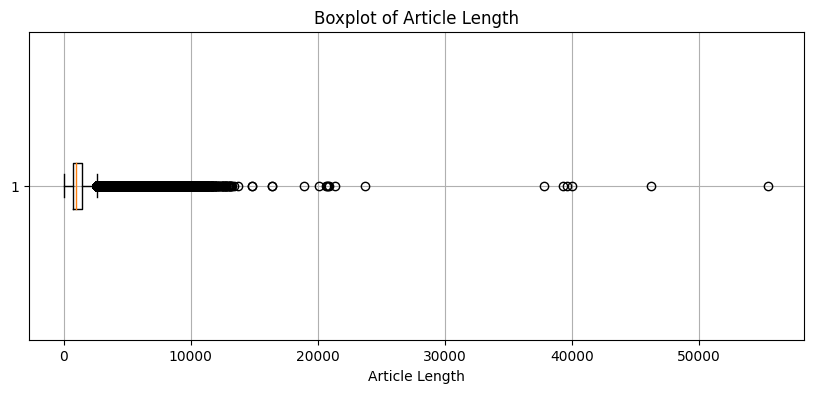

Minimum Article Length: 3.0
Maximum Article Length: 2606.0


In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
boxplot = plt.boxplot(df_news['article_length'], vert=0)
plt.xlabel('Article Length')
plt.title('Boxplot of Article Length')
plt.grid()
plt.show()

# Extract the minimum and maximum values of the whiskers
whiskers = [item.get_xdata() for item in boxplot['whiskers']]
minimum = min(whiskers[0])
maximum = max(whiskers[1])
print("Minimum Article Length:", minimum)
print("Maximum Article Length:", maximum)

In [42]:
df_news[df_news['article_length']<50].shape[0]

1385

In [43]:
df_news[df_news['article_length']>2606].shape[0]

6084

In [45]:
df_news = df_news[(df_news['article_length']>50) & (df_news['article_length']<2400)]
df_news.shape

(156218, 9)

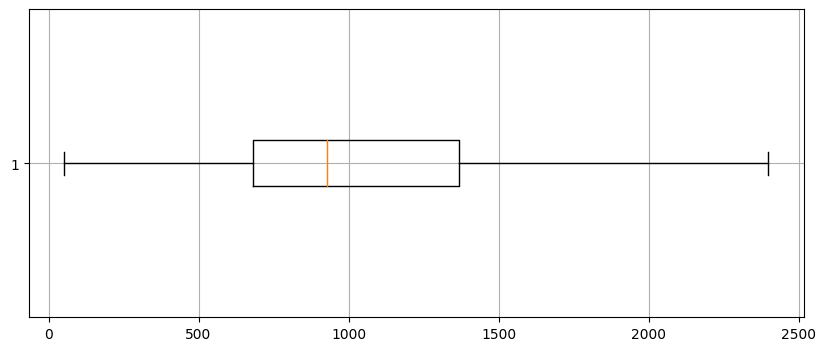

In [46]:
plt.figure(figsize=(10,4))
plt.boxplot(df_news['article_length'], vert = 0)
plt.grid()
plt.show()

In [47]:
df_news.head(2)

,url,date,title,text,title_tokens,title_token_text,reg_keywords,article_length,title_length
0,http://en.people.cn/n3/2021/0318/c90000-9830122.html,2021-03-18,Artificial intelligence improves parking efficiency in Chinese cities - People's Daily Online,Artificial intelligence improves parking efficiency in Chinese cities - People's Daily Online Home China Politics Foreign Affairs Opinions Video: We Are China Business Military World Society Cult...,"[artificial, intelligence, improves, parking, efficiency, chinese, cities, people, daily, online]",artificial intelligence improves parking efficiency chinese cities people daily online,0,833,12
1,http://newsparliament.com/2020/02/27/children-with-autism-saw-their-learning-and-social-skills-boosted-after-playing-with-this-ai-robot/,2020-02-27,Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot News Parliament,"Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot News Parliament Skip to content Thursday, February , Latest: Mansplaining in conferences: How c...","[children, autism, saw, learning, social, skills, boosted, playing, ai, robot, news, parliament]",children autism saw learning social skills boosted playing ai robot news parliament,0,1516,18


In [48]:
pandarallel.initialize(nb_workers=15, use_memory_fs=False)

INFO: Pandarallel will run on 15 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [50]:
# Remove duplicates based on text or title
df_news = df_news.drop_duplicates(subset=['text'])
df_news.shape

(154184, 9)

In [51]:
df_news.head(1)

,url,date,title,text,title_tokens,title_token_text,reg_keywords,article_length,title_length
0,http://en.people.cn/n3/2021/0318/c90000-9830122.html,2021-03-18,Artificial intelligence improves parking efficiency in Chinese cities - People's Daily Online,Artificial intelligence improves parking efficiency in Chinese cities - People's Daily Online Home China Politics Foreign Affairs Opinions Video: We Are China Business Military World Society Cult...,"[artificial, intelligence, improves, parking, efficiency, chinese, cities, people, daily, online]",artificial intelligence improves parking efficiency chinese cities people daily online,0,833,12


In [52]:
df_news.drop(columns = ['article_length','title_length','title_tokens','title_token_text','reg_keywords'], inplace = True)

In [53]:
# Save the DataFrame to a file (e.g., CSV or pickle)
df_news.to_csv('df_news_1.csv', index=False)


In [54]:
pandarallel.initialize(nb_workers=15, use_memory_fs=False)

INFO: Pandarallel will run on 15 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [55]:
custom_stopwords_list = [*set(['provided', 'courtesy', 'prnewswire', 'view', 'opinion', 'statement',
                               'press', 'release', 'endorsed', 'gray', 'medium', 'group', 'necessarily',
                               'state', 'reflect','january', 'february','march',  'december', 'november',
                               'october', 'september', 'august', 'july', 'june', 'april','may','blog',
                               'journalist', 'editorial', 'rights', 'reserved', 'privacy', 'policy'])]

In [59]:
%%time

df_news['tokens'] = df_news['text'].parallel_apply(news_tokenize_and_clean_text, stopwords = set(nlp.Defaults.stop_words), custom_stopwords =  custom_stopwords_list)

CPU times: user 13.6 s, sys: 11.5 s, total: 25.1 s
Wall time: 3min 2s


In [60]:
%%time

df_news['token_text'] = df_news['tokens'].parallel_apply(tokens_to_text)

CPU times: user 32.2 s, sys: 13.7 s, total: 45.9 s
Wall time: 47.5 s


In [61]:
# Save the DataFrame to a file (e.g., CSV or pickle)
df_news.to_csv('df_news_c.csv', index=False)